In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-1/train.csv
/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv


In [2]:
train_csv = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv')
#
train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [3]:
# combine Country region and Province state: and avoide NAN values 
train_csv['combine state'] = train_csv['Country/Region'].fillna('') + str(': ') +train_csv['Province/State'].fillna('')


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16756 entries, 0 to 16755
Data columns (total 9 columns):
Id                16756 non-null int64
Province/State    7670 non-null object
Country/Region    16756 non-null object
Lat               16697 non-null float64
Long              16697 non-null float64
Date              16756 non-null object
ConfirmedCases    16756 non-null float64
Fatalities        16756 non-null float64
combine state     16756 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [5]:
train_csv.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,16756.000000,16697.000000,16697.000000,16756.000000,16756.000000
mean,13189.500000,26.337324,5.039603,271.750119,9.221533
std,7624.686932,22.963063,79.935267,3261.152305,141.524582
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6595.250000,13.193900,-71.530100,0.000000,0.000000
50%,13189.500000,33.000000,10.000000,0.000000,0.000000
75%,19783.750000,42.506300,65.000000,7.000000,0.000000
max,26378.000000,72.000000,174.886000,67800.000000,4032.000000


# EDA: using ProfilerReport 


In [6]:
from pandas_profiling import ProfileReport
train_profile = ProfileReport(train_csv, title='Pandas Profiling Report', html={'style':{'full_width':True}})
train_profile

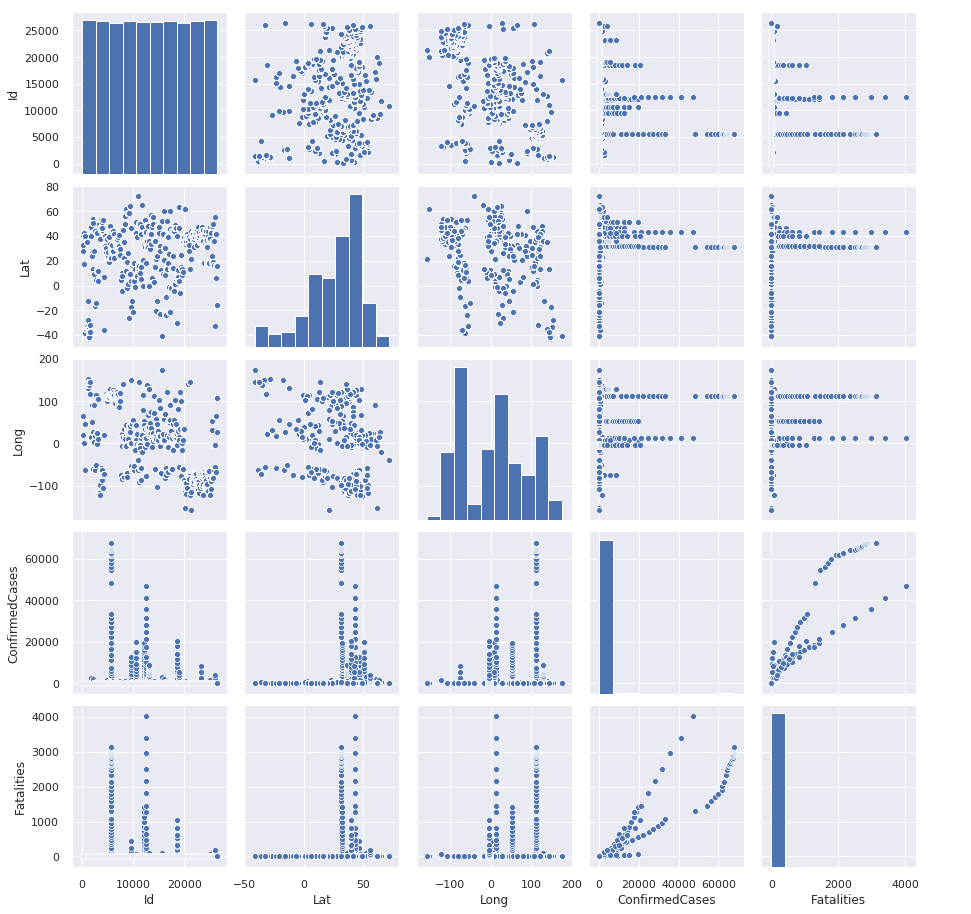

In [7]:
# CREATE SCATTER PLOT 
sns.set()
sns.pairplot(train_csv)

In [8]:
# we dont need the whole dataframe to analyze
train_csv = train_csv.set_index('Date')
col = ['combine state',
       'ConfirmedCases', 'Fatalities']
df = train_csv[col]
'''df = df.groupby('Country/Region')
#df = df.sort_values(by = 'Fatalities', ascending = False )
df'''
df.head()

,combine state,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Afghanistan:,0.0,0.0
2020-01-23,Afghanistan:,0.0,0.0
2020-01-24,Afghanistan:,0.0,0.0
2020-01-25,Afghanistan:,0.0,0.0
2020-01-26,Afghanistan:,0.0,0.0


In [9]:
# extract the unique names from the dataframe 
country = df['combine state'].unique()


# plot: Fatalities and Confirmed cases vs Time 
countries affected the most (number of deaths >100)

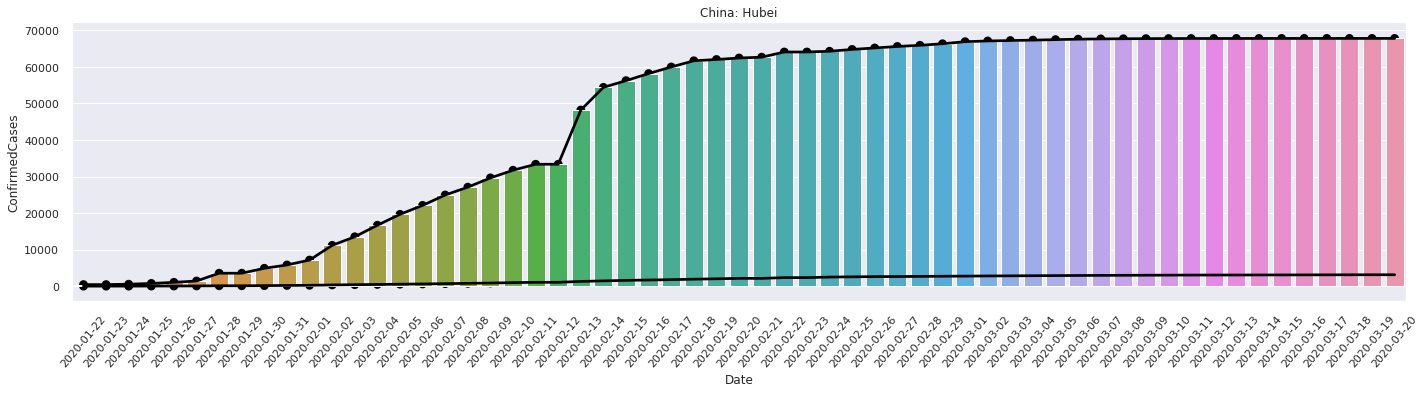

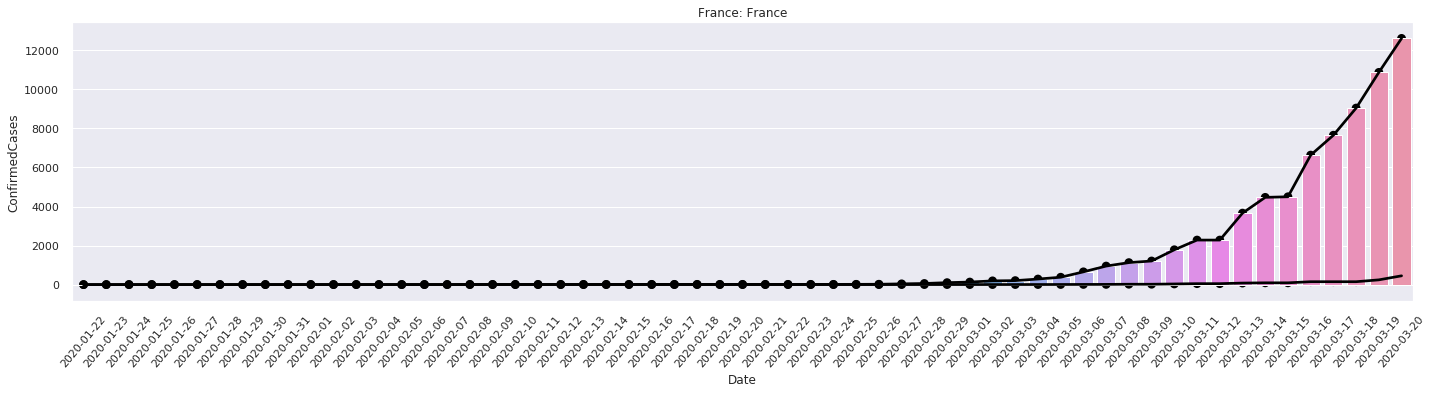

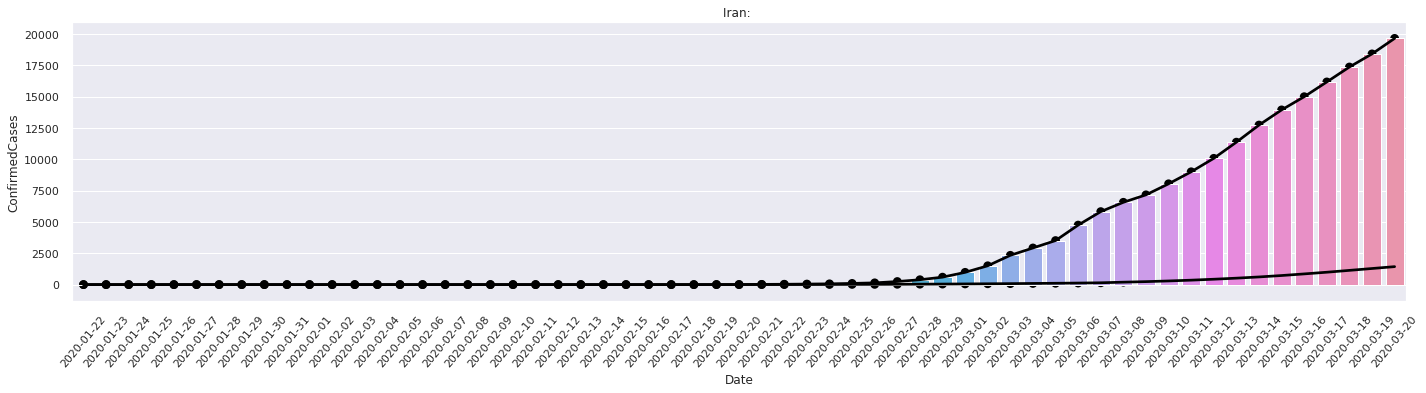

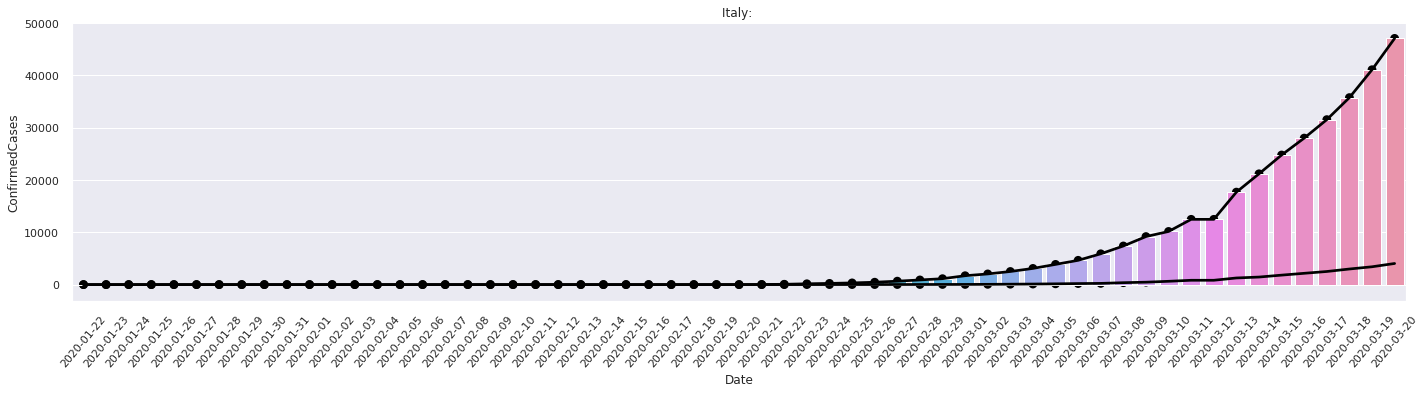

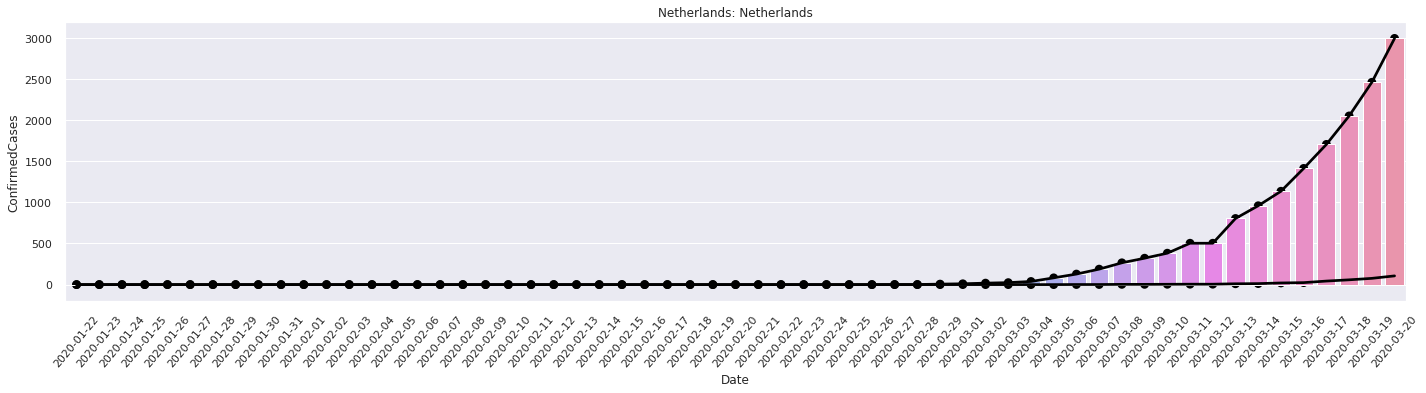

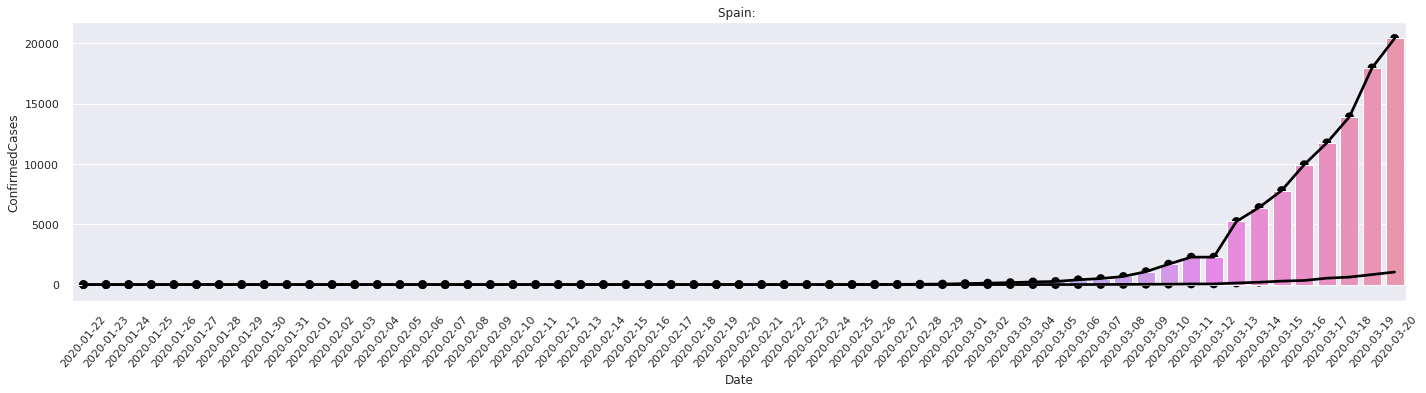

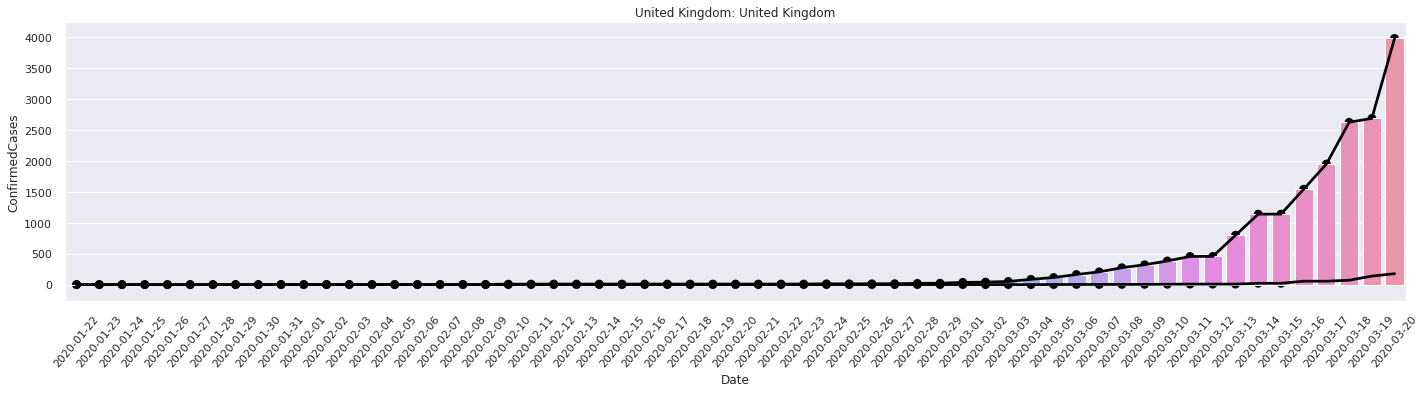

In [10]:
for i in range(len(country)):
    df1 = df[df['combine state'].str.match(country[i])]
    if len(df1)>1:
        if max(df1['Fatalities'].values) > 100 :
            plt.figure(figsize = [20,5])
            title = str(country[i])
            plt.title(title, fontsize=12)
            #plt.subplot(2,1,1)
            #plt.plot(df1.index, df1['Fatalities'], '-o')
            sns.barplot(x=df1.index,y=df1['Fatalities'])
            sns.pointplot(x=df1.index,y=df1['Fatalities'],color='Black')
            plt.tight_layout()
            title = str(country[i])

            plt.xlabel('Time', fontsize=12)
            plt.ylabel('Number of People', fontsize=12)
            sns.barplot(x=df1.index,y=df1['ConfirmedCases'])
            sns.pointplot(x=df1.index,y=df1['ConfirmedCases'],color='Black')
            #plt.subplot(2,2,1)
            #plt.plot(df1.index, df1['ConfirmedCases'], '-*')

            plt.legend(fontsize=12)

            plt.xticks(rotation = 50)
            plt.show()

In [11]:
Country = []
Fatalities = []
affected = []

In [12]:


for i in range(len(country)):
    df1 = df[df['combine state'].str.match(country[i])]
    if len(df1)>1:
        if max(df1['Fatalities'].values) > 0:
            Country.append(country[i])
            Fatalities.append(max(df1['Fatalities'].values))
            affected.append(max(df1['ConfirmedCases'].values))
            #print( 'Name of the country: ', country[i], ', Total number of deaths: ', max(df1['Fatalities'].values), ', Total affected people: ', max(df1['ConfirmedCases'].values)  )


# Total number of confirmed cases and deaths in every country's province (if given) 

In [13]:
final = pd.DataFrame((np.array(Country), np.array(Fatalities), np.array(affected)))
final = pd.DataFrame.transpose(final)
columns = ['country/province', 'Fatalities', 'Number of Confirmed cases']
final.columns = columns
final

,country/province,Fatalities,Number of Confirmed cases
0,Albania:,2,70
1,Algeria:,11,90
2,Argentina:,3,128
3,Australia: New South Wales,6,353
4,Australia: Western Australia,1,64
...,...,...,...
127,US: Wisconsin,3,207
128,Ukraine:,3,29
129,United Arab Emirates:,2,140
130,United Kingdom: Cayman Islands,1,3


# Bar plot of, Top 15% countries with maximum deaths reported and maximum affected people
### Conclusion: There are Few countries where fatality rate is high but number of confirmed cases is less as compare to other countries and vice versa. Germany and Iran are the best examples. 

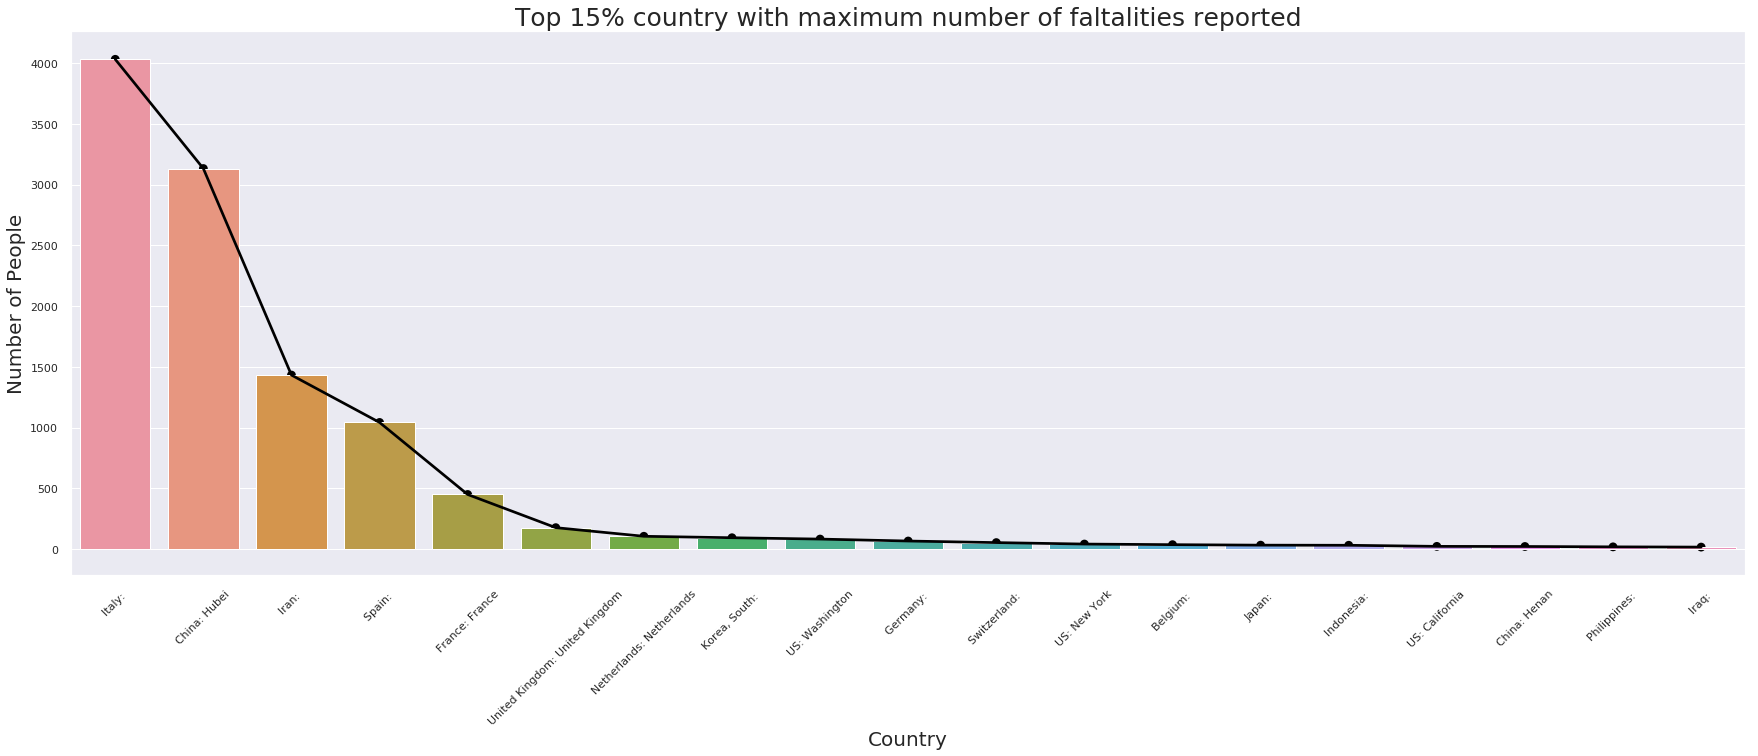

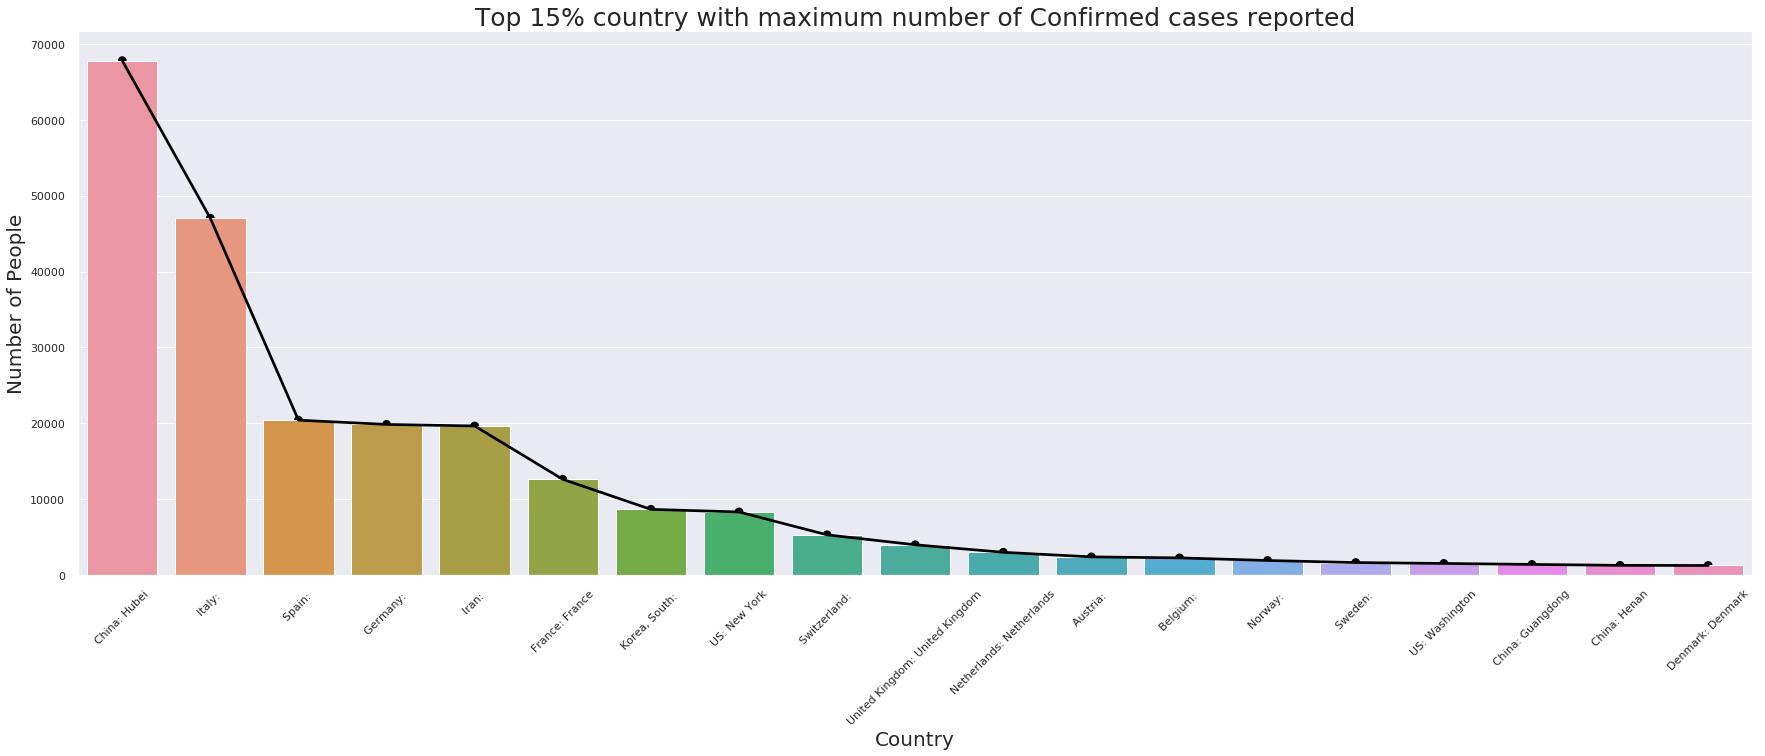

In [14]:
plt.figure(figsize = [30,10])
final = final.sort_values(by='Fatalities', ascending=False)
final10 = final.iloc[:int(len(final)*0.15), :]
#plt.bar(final10['country/province'],final10['Fatalities'])
sns.barplot(x=final10['country/province'],y=final10['Fatalities'])
sns.pointplot(x=final10['country/province'],y=final10['Fatalities'],color='Black')
plt.xticks(rotation = 45)
plt.title("Top 15% country with maximum number of faltalities reported", fontsize=25)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number of People', fontsize=20)

plt.figure(figsize = [30,10])

final = final.sort_values(by='Number of Confirmed cases', ascending=False)
final1 = final.iloc[:int(len(final)*0.15), :]
#plt.bar(final1['country/province'],final1['Number of Confirmed cases'] )
sns.barplot(x=final1['country/province'],y=final1['Number of Confirmed cases'])
sns.pointplot(x=final1['country/province'],y=final1['Number of Confirmed cases'],color='Black')
plt.title("Top 15% country with maximum number of Confirmed cases reported", fontsize=25)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number of People', fontsize=20)
plt.xticks(rotation = 45)
plt.show()
